# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install pandas

In [2]:
!pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from pprint import pprint

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

citiInfo=[]
#cities = cities[0:10]  --> this can be done if only picking the first ten records, the zeroth until the 9th record..

Query_URL= url + "appid=" + weather_api_key + "&q=" +city

NameError: name 'city' is not defined

In [17]:
citydata= requests.get(Query_URL).json()

#print(json.dumps(citydata, indent = 4, sort_keys = True))


#IMPORTANT NOTE:  temperature is in degrees Kelvin

NameError: name 'Query_URL' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# get all the info needed for each column
C_long = citydata["coord"]["lon"]
C_lat = citydata["coord"]["lat"]
C_humidity = citydata["main"]["humidity"]
C_tempmax =citydata["main"]["temp_max"]
C_cloudiness=citydata["clouds"]["all"]
C_windspeed=citydata["wind"]["speed"]
C_country =citydata["sys"]["country"]
C_date=citydata["dt"]



NameError: name 'citydata' is not defined

In [10]:
#print(C_country)

In [16]:
#create a dataframe with this info for the [10] cities in "city"  --> need to change to more cities later on.

for city in cities:
    try:
        Query_URL= url + "appid=" + weather_api_key + "&q=" + city
        citydata= requests.get(Query_URL).json()

        C_long = citydata["coord"]["lon"]
        C_lat = citydata["coord"]["lat"]
        C_humidity = citydata["main"]["humidity"]
        C_tempmax =citydata["main"]["temp_max"]
        C_cloudiness=citydata["clouds"]["all"]
        C_windspeed=citydata["wind"]["speed"]
        C_country =citydata["sys"]["country"]
        C_date=citydata["dt"]


        city_dict = {

            "City": city,
            "Latitude": C_lat,
            "Long": C_long,
            "Max. Temp": C_tempmax,
            "Humidity": C_humidity,
            "Cloudiness": C_cloudiness,
            "Wind Speed": C_windspeed,
            "Country": C_country,
            "Date": C_date 
        }
        citiInfo.append(city_dict)
    except:
        pass
    
#print(citiInfo)
from pprint import pprint
pprint(citiInfo)
#print(len(cityInfo_df))-- cant do length on a dataframe

[{'City': 'mar del plata',
  'Cloudiness': 75,
  'Country': 'AR',
  'Date': 1606326456,
  'Humidity': 83,
  'Latitude': -38,
  'Long': -57.56,
  'Max. Temp': 296.15,
  'Wind Speed': 0.5},
 {'City': 'cidreira',
  'Cloudiness': 20,
  'Country': 'BR',
  'Date': 1606326462,
  'Humidity': 66,
  'Latitude': -30.18,
  'Long': -50.21,
  'Max. Temp': 299.94,
  'Wind Speed': 6.27},
 {'City': 'hambantota',
  'Cloudiness': 70,
  'Country': 'LK',
  'Date': 1606326256,
  'Humidity': 83,
  'Latitude': 6.12,
  'Long': 81.12,
  'Max. Temp': 299.07,
  'Wind Speed': 6.31},
 {'City': 'straumen',
  'Cloudiness': 75,
  'Country': 'NO',
  'Date': 1606326575,
  'Humidity': 75,
  'Latitude': 63.87,
  'Long': 11.3,
  'Max. Temp': 280.37,
  'Wind Speed': 8.2},
 {'City': 'mar del plata',
  'Cloudiness': 75,
  'Country': 'AR',
  'Date': 1606326456,
  'Humidity': 83,
  'Latitude': -38,
  'Long': -57.56,
  'Max. Temp': 296.15,
  'Wind Speed': 0.5},
 {'City': 'cidreira',
  'Cloudiness': 20,
  'Country': 'BR',
  'Date

  'Date': 1606326350,
  'Humidity': 44,
  'Latitude': -42.88,
  'Long': 147.33,
  'Max. Temp': 288.15,
  'Wind Speed': 8.2},
 {'City': 'nikolskoye',
  'Cloudiness': 75,
  'Country': 'RU',
  'Date': 1606326292,
  'Humidity': 92,
  'Latitude': 59.7,
  'Long': 30.79,
  'Max. Temp': 272.15,
  'Wind Speed': 3},
 {'City': 'imbituba',
  'Cloudiness': 40,
  'Country': 'BR',
  'Date': 1606326862,
  'Humidity': 61,
  'Latitude': -28.24,
  'Long': -48.67,
  'Max. Temp': 301.15,
  'Wind Speed': 8.2},
 {'City': 'antofagasta',
  'Cloudiness': 20,
  'Country': 'CL',
  'Date': 1606326301,
  'Humidity': 59,
  'Latitude': -23.65,
  'Long': -70.4,
  'Max. Temp': 294.82,
  'Wind Speed': 6.2},
 {'City': 'suzhou',
  'Cloudiness': 100,
  'Country': 'CN',
  'Date': 1606326863,
  'Humidity': 99,
  'Latitude': 31.31,
  'Long': 120.62,
  'Max. Temp': 284.82,
  'Wind Speed': 5.27},
 {'City': 'foumban',
  'Cloudiness': 87,
  'Country': 'CM',
  'Date': 1606326863,
  'Humidity': 50,
  'Latitude': 5.73,
  'Long': 10.

  'Country': 'PE',
  'Date': 1606326871,
  'Humidity': 48,
  'Latitude': -4.27,
  'Long': -81.21,
  'Max. Temp': 301.15,
  'Wind Speed': 6.2},
 {'City': 'geilo',
  'Cloudiness': 48,
  'Country': 'NO',
  'Date': 1606326871,
  'Humidity': 24,
  'Latitude': 60.53,
  'Long': 8.21,
  'Max. Temp': 273.15,
  'Wind Speed': 6.71},
 {'City': 'avera',
  'Cloudiness': 90,
  'Country': 'US',
  'Date': 1606326477,
  'Humidity': 82,
  'Latitude': 33.19,
  'Long': -82.53,
  'Max. Temp': 293.15,
  'Wind Speed': 2.1},
 {'City': 'new norfolk',
  'Cloudiness': 48,
  'Country': 'AU',
  'Date': 1606326449,
  'Humidity': 44,
  'Latitude': -42.78,
  'Long': 147.06,
  'Max. Temp': 288.15,
  'Wind Speed': 8.2},
 {'City': 'penzance',
  'Cloudiness': 20,
  'Country': 'GB',
  'Date': 1606326871,
  'Humidity': 81,
  'Latitude': 50.12,
  'Long': -5.54,
  'Max. Temp': 279.15,
  'Wind Speed': 4.1},
 {'City': 'grenfell',
  'Cloudiness': 0,
  'Country': 'AU',
  'Date': 1606326871,
  'Humidity': 63,
  'Latitude': -33.9,


  'Latitude': 46.73,
  'Long': 36.34,
  'Max. Temp': 278.67,
  'Wind Speed': 5.02},
 {'City': 'ko samui',
  'Cloudiness': 75,
  'Country': 'TH',
  'Date': 1606326876,
  'Humidity': 73,
  'Latitude': 9.54,
  'Long': 99.94,
  'Max. Temp': 301.41,
  'Wind Speed': 7.07},
 {'City': 'south valley',
  'Cloudiness': 1,
  'Country': 'US',
  'Date': 1606326876,
  'Humidity': 41,
  'Latitude': 35.01,
  'Long': -106.68,
  'Max. Temp': 281.48,
  'Wind Speed': 1.5},
 {'City': 'petropavlovsk-kamchatskiy',
  'Cloudiness': 10,
  'Country': 'RU',
  'Date': 1606326473,
  'Humidity': 73,
  'Latitude': 53.05,
  'Long': 158.65,
  'Max. Temp': 267.15,
  'Wind Speed': 3},
 {'City': 'hirara',
  'Cloudiness': 41,
  'Country': 'JP',
  'Date': 1606326876,
  'Humidity': 77,
  'Latitude': 24.8,
  'Long': 125.28,
  'Max. Temp': 296.96,
  'Wind Speed': 8.67},
 {'City': 'port hedland',
  'Cloudiness': 84,
  'Country': 'AU',
  'Date': 1606326475,
  'Humidity': 74,
  'Latitude': -20.32,
  'Long': 118.57,
  'Max. Temp': 

  'Max. Temp': 299.15,
  'Wind Speed': 8.2},
 {'City': 'gusau',
  'Cloudiness': 0,
  'Country': 'NG',
  'Date': 1606326882,
  'Humidity': 30,
  'Latitude': 12.16,
  'Long': 6.66,
  'Max. Temp': 300.31,
  'Wind Speed': 1.92},
 {'City': 'solhan',
  'Cloudiness': 100,
  'Country': 'TR',
  'Date': 1606326882,
  'Humidity': 71,
  'Latitude': 38.96,
  'Long': 41.03,
  'Max. Temp': 276.71,
  'Wind Speed': 0.9},
 {'City': 'itanagar',
  'Cloudiness': 61,
  'Country': 'IN',
  'Date': 1606326882,
  'Humidity': 58,
  'Latitude': 27.1,
  'Long': 93.62,
  'Max. Temp': 288.44,
  'Wind Speed': 1.71},
 {'City': 'torbay',
  'Cloudiness': 20,
  'Country': 'CA',
  'Date': 1606326486,
  'Humidity': 49,
  'Latitude': 47.67,
  'Long': -52.73,
  'Max. Temp': 271.48,
  'Wind Speed': 6.7},
 {'City': 'san jose',
  'Cloudiness': 75,
  'Country': 'US',
  'Date': 1606326596,
  'Humidity': 81,
  'Latitude': 37.34,
  'Long': -121.89,
  'Max. Temp': 287.04,
  'Wind Speed': 3.45},
 {'City': 'alta floresta',
  'Cloudine

  'Wind Speed': 4.04},
 {'City': 'katsuura',
  'Cloudiness': 20,
  'Country': 'JP',
  'Date': 1606326443,
  'Humidity': 93,
  'Latitude': 35.13,
  'Long': 140.3,
  'Max. Temp': 284.15,
  'Wind Speed': 1},
 {'City': 'birao',
  'Cloudiness': 23,
  'Country': 'CF',
  'Date': 1606326887,
  'Humidity': 27,
  'Latitude': 10.28,
  'Long': 22.79,
  'Max. Temp': 300.69,
  'Wind Speed': 1.48},
 {'City': 'baykit',
  'Cloudiness': 96,
  'Country': 'RU',
  'Date': 1606326887,
  'Humidity': 90,
  'Latitude': 61.67,
  'Long': 96.37,
  'Max. Temp': 257.69,
  'Wind Speed': 0.59},
 {'City': 'broome',
  'Cloudiness': 90,
  'Country': 'US',
  'Date': 1606326887,
  'Humidity': 60,
  'Latitude': 42.25,
  'Long': -75.83,
  'Max. Temp': 280.93,
  'Wind Speed': 5.1},
 {'City': 'morgan city',
  'Cloudiness': 90,
  'Country': 'US',
  'Date': 1606326780,
  'Humidity': 83,
  'Latitude': 29.7,
  'Long': -91.21,
  'Max. Temp': 299.15,
  'Wind Speed': 8.2},
 {'City': 'baoning',
  'Cloudiness': 90,
  'Country': 'CN',


  'Latitude': -2.02,
  'Long': 147.27,
  'Max. Temp': 300.53,
  'Wind Speed': 1.34},
 {'City': 'kadaya',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1606326892,
  'Humidity': 86,
  'Latitude': 50.93,
  'Long': 119.29,
  'Max. Temp': 252.49,
  'Wind Speed': 1.26},
 {'City': 'coquimbo',
  'Cloudiness': 0,
  'Country': 'CL',
  'Date': 1606326327,
  'Humidity': 56,
  'Latitude': -29.95,
  'Long': -71.34,
  'Max. Temp': 293.15,
  'Wind Speed': 8.2},
 {'City': 'rodrigues alves',
  'Cloudiness': 75,
  'Country': 'BR',
  'Date': 1606326596,
  'Humidity': 63,
  'Latitude': -7.74,
  'Long': -72.65,
  'Max. Temp': 307.15,
  'Wind Speed': 2.6},
 {'City': 'rio gallegos',
  'Cloudiness': 40,
  'Country': 'AR',
  'Date': 1606326892,
  'Humidity': 31,
  'Latitude': -51.62,
  'Long': -69.22,
  'Max. Temp': 289.15,
  'Wind Speed': 7.2},
 {'City': 'hobyo',
  'Cloudiness': 4,
  'Country': 'SO',
  'Date': 1606326892,
  'Humidity': 78,
  'Latitude': 5.35,
  'Long': 48.53,
  'Max. Temp': 299.86,
  'Wind 

  'Long': -97.52,
  'Max. Temp': 300.15,
  'Wind Speed': 3.1},
 {'City': 'batagay-alyta',
  'Cloudiness': 88,
  'Country': 'RU',
  'Date': 1606326900,
  'Humidity': 74,
  'Latitude': 67.8,
  'Long': 130.41,
  'Max. Temp': 253.93,
  'Wind Speed': 1.2},
 {'City': 'kulunda',
  'Cloudiness': 7,
  'Country': 'RU',
  'Date': 1606326900,
  'Humidity': 96,
  'Latitude': 52.57,
  'Long': 78.94,
  'Max. Temp': 262.01,
  'Wind Speed': 2.3},
 {'City': 'tongzi',
  'Cloudiness': 98,
  'Country': 'CN',
  'Date': 1606326900,
  'Humidity': 61,
  'Latitude': 28.78,
  'Long': 105.09,
  'Max. Temp': 285.35,
  'Wind Speed': 0.8},
 {'City': 'riyadh',
  'Cloudiness': 0,
  'Country': 'SA',
  'Date': 1606326163,
  'Humidity': 34,
  'Latitude': 24.69,
  'Long': 46.72,
  'Max. Temp': 293.15,
  'Wind Speed': 2.6},
 {'City': 'bubaque',
  'Cloudiness': 39,
  'Country': 'GW',
  'Date': 1606326487,
  'Humidity': 50,
  'Latitude': 11.28,
  'Long': -15.83,
  'Max. Temp': 302.79,
  'Wind Speed': 3.01},
 {'City': 'kavien

  'Cloudiness': 0,
  'Country': 'AU',
  'Date': 1606326917,
  'Humidity': 68,
  'Latitude': -32.5,
  'Long': 137.77,
  'Max. Temp': 291.15,
  'Wind Speed': 2.1},
 {'City': 'bauchi',
  'Cloudiness': 89,
  'Country': 'NG',
  'Date': 1606326917,
  'Humidity': 29,
  'Latitude': 10.5,
  'Long': 10,
  'Max. Temp': 299.98,
  'Wind Speed': 2.53},
 {'City': 'ondjiva',
  'Cloudiness': 40,
  'Country': 'AO',
  'Date': 1606326917,
  'Humidity': 39,
  'Latitude': -17.07,
  'Long': 15.73,
  'Max. Temp': 302.76,
  'Wind Speed': 3.24},
 {'City': 'la paz',
  'Cloudiness': 75,
  'Country': 'BO',
  'Date': 1606326491,
  'Humidity': 29,
  'Latitude': -16.5,
  'Long': -68.15,
  'Max. Temp': 292.15,
  'Wind Speed': 6.2},
 {'City': 'nurota',
  'Cloudiness': 0,
  'Country': 'UZ',
  'Date': 1606326918,
  'Humidity': 63,
  'Latitude': 40.56,
  'Long': 65.69,
  'Max. Temp': 271.15,
  'Wind Speed': 5.1},
 {'City': 'santa maria',
  'Cloudiness': 98,
  'Country': 'BR',
  'Date': 1606326918,
  'Humidity': 25,
  'Lat

In [17]:
print(len(citiInfo))

564


In [18]:
# Only to be run after all rows/cities have been converted to a dict and appended to list 
cityInfo_df=pd.DataFrame(citiInfo)

print(cityInfo_df.shape)
print(cityInfo_df.shape[0])
print(cityInfo_df.shape[1])
cityInfo_df


(564, 9)
564
9


,City,Latitude,Long,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,296.15,83,75,0.50,AR,1606326456
1,cidreira,-30.18,-50.21,299.94,66,20,6.27,BR,1606326462
2,hambantota,6.12,81.12,299.07,83,70,6.31,LK,1606326256
3,straumen,63.87,11.30,280.37,75,75,8.20,NO,1606326575
4,mar del plata,-38.00,-57.56,296.15,83,75,0.50,AR,1606326456
...,...,...,...,...,...,...,...,...,...
559,dhidhdhoo,6.88,73.10,300.91,65,84,3.66,MV,1606326923
560,gualeguay,-33.14,-59.31,304.87,46,52,3.71,AR,1606326764
561,nenjiang,49.18,125.22,261.07,92,0,4.31,CN,1606326924
562,neyshabur,36.21,58.80,277.85,63,11,0.18,IR,1606326717


In [19]:
#export this out to csv so as not to run the APIs portion again
cityInfo_df.to_csv("564_cities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#now use this csv for the rest of assignment

citydata=pd.read_csv("564_cities.csv")
citydata

,Unnamed: 0,City,Latitude,Long,Max. Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,mar del plata,-38.00,-57.56,296.15,83,75,0.50,AR,1606326456
1,1,cidreira,-30.18,-50.21,299.94,66,20,6.27,BR,1606326462
2,2,hambantota,6.12,81.12,299.07,83,70,6.31,LK,1606326256
3,3,straumen,63.87,11.30,280.37,75,75,8.20,NO,1606326575
4,4,mar del plata,-38.00,-57.56,296.15,83,75,0.50,AR,1606326456
...,...,...,...,...,...,...,...,...,...,...
559,559,dhidhdhoo,6.88,73.10,300.91,65,84,3.66,MV,1606326923
560,560,gualeguay,-33.14,-59.31,304.87,46,52,3.71,AR,1606326764
561,561,nenjiang,49.18,125.22,261.07,92,0,4.31,CN,1606326924
562,562,neyshabur,36.21,58.80,277.85,63,11,0.18,IR,1606326717


In [9]:
# create a summary statistics table
citydata.describe()

,Unnamed: 0,Latitude,Long,Max. Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.00000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,281.50000,20.390603,15.432305,285.591401,72.138298,54.789007,3.816223,1.606327e+09
std,162.95705,33.825593,91.441943,14.888511,20.677306,37.123860,2.993539,2.184524e+02
min,0.00000,-54.800000,-179.170000,246.100000,10.000000,0.000000,0.110000,1.606326e+09
25%,140.75000,-8.237500,-67.027500,273.562500,61.000000,20.000000,1.665000,1.606326e+09
50%,281.50000,27.770000,19.695000,288.710000,78.000000,71.500000,3.100000,1.606327e+09
75%,422.25000,47.987500,93.135000,298.577500,88.000000,90.000000,5.100000,1.606327e+09
max,563.00000,78.220000,178.420000,311.400000,100.000000,100.000000,25.360000,1.606327e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
indexNames = citydata[citydata['Humidity'] >=100 ].index

indexNames

Int64Index([9, 15, 29, 83, 86, 186, 216, 224, 280, 283, 284, 297, 298, 302,
            352, 527],
           dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# 564-16 = 548 cities should remain

#in-place=true replaces the df

citydata.drop(indexNames, inplace= True)
         

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
#identify all the parameters to be plotted
latitude=citydata["Latitude"]
temperature=citydata["Max. Temp"]
Humidity=citydata["Humidity"]
Cloudiness=citydata["Cloudiness"]
Windspeed=citydata["Wind Speed"]

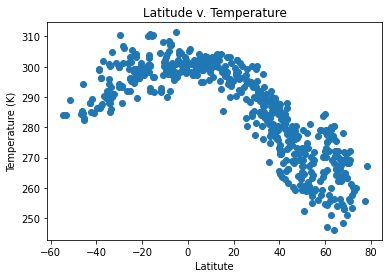

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(latitude, temperature)

plt.xlabel("Latitute")
plt.ylabel("Temperature (K)")
plt.title("Latitude v. Temperature")
plt.show()
plt.savefig("fig1.png")

## Latitude vs. Humidity Plot

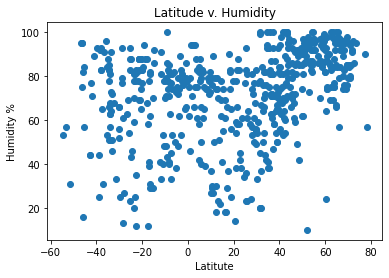

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(latitude, Humidity)

plt.xlabel("Latitute")
plt.ylabel("Humidity %")
plt.title("Latitude v. Humidity")
plt.show()
plt.savefig("fig2.png")

## Latitude vs. Cloudiness Plot

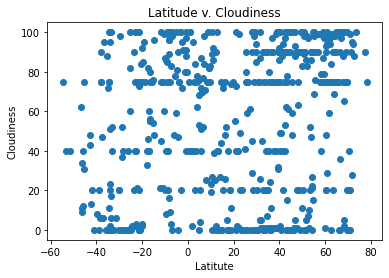

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(latitude, Cloudiness)
plt.xlabel("Latitute")
plt.ylabel("Cloudiness")
plt.title("Latitude v. Cloudiness")
plt.show()
plt.savefig("fig3.png")

## Latitude vs. Wind Speed Plot

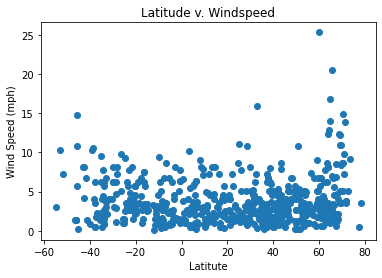

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(latitude, Windspeed)
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude v. Windspeed")
plt.show()
plt.savefig("fig4.png")

## Linear Regression

In [92]:
# make a list of all indices 

#north= citydata[citydata['Latitude'] >=0].index
#print(north)
#south= citydata[citydata['Latitude'] <0 ].index
#print(south)
# 373+175 = 548 records==good!

Int64Index([  2,   3,   6,   7,   8,  10,  11,  13,  14,  18,
            ...
            545, 546, 549, 550, 552, 554, 558, 559, 561, 562],
           dtype='int64', length=373)
Int64Index([  0,   1,   4,   5,  12,  16,  17,  19,  23,  25,
            ...
            543, 547, 548, 551, 553, 555, 556, 557, 560, 563],
           dtype='int64', length=175)


In [13]:
#make two dataframes for plotting purposes

north= citydata[citydata['Latitude'] >=0]
print(north)
south= citydata[citydata['Latitude'] <0 ]
print(south)

     Unnamed: 0            City  Latitude    Long  Max. Temp  Humidity  \
2             2      hambantota      6.12   81.12     299.07        83   
3             3        straumen     63.87   11.30     280.37        75   
6             6      hambantota      6.12   81.12     299.07        83   
7             7        straumen     63.87   11.30     280.37        75   
8             8      nouadhibou     20.93  -17.03     298.15        38   
..          ...             ...       ...     ...        ...       ...   
554         554        at-bashi     41.17   75.81     263.47        75   
558         558  vestmannaeyjar     63.44  -20.27     277.15        69   
559         559       dhidhdhoo      6.88   73.10     300.91        65   
561         561        nenjiang     49.18  125.22     261.07        92   
562         562       neyshabur     36.21   58.80     277.85        63   

     Cloudiness  Wind Speed Country        Date  
2            70        6.31      LK  1606326256  
3          

In [14]:
# identify all the parameters to be plotted from the new dataframes

latitude1=north["Latitude"]
temperature1=north["Max. Temp"]
Humidity1=north["Humidity"]
Cloudiness1=north["Cloudiness"]
Windspeed1=north["Wind Speed"]

latitude2=south["Latitude"]
temperature2=south["Max. Temp"]
Humidity2=south["Humidity"]
Cloudiness2=south["Cloudiness"]
Windspeed2=south["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
from scipy.stats import linregress
from scipy.stats import sem

from scipy import stats

y=-0.65x+306.16


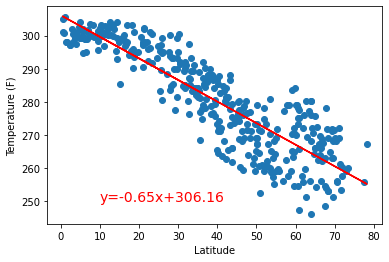

In [43]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude1, temperature1)

# Get regression values for temperature
regressionvalues_temp1 = latitude1 * slope + intercept
#regressionvalues_temp1

plt.scatter(latitude1,temperature1)
plt.plot(latitude1, regressionvalues_temp1, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)") 
plt.text(10, 250, line, fontsize=14, color="red")
plt.savefig("fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y=0.32x+303.94


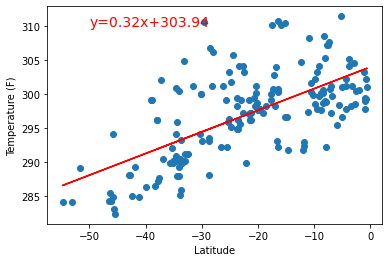

In [44]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude2, temperature2)

# Get regression values for temperature
regressionvalues_temp2 = latitude2 * slope + intercept
#regressionvalues_temp2

plt.scatter(latitude2,temperature2)
plt.plot(latitude2, regressionvalues_temp2, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.text(-50, 310, line, fontsize=14, color="red")
plt.savefig("fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y=0.44x+56.16


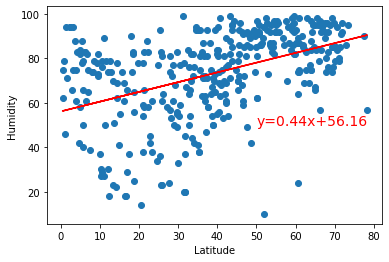

In [45]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude1, Humidity1)
regressionvalues_hum1 = latitude1 * slope + intercept

plt.scatter(latitude1,Humidity1)
plt.plot(latitude1, regressionvalues_hum1, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(50, 50, line, fontsize=14, color="red")
plt.savefig("fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y=0.05x+67.9


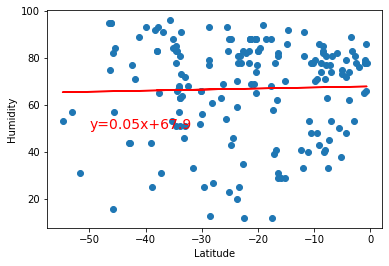

In [46]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude2, Humidity2)
regressionvalues_hum2 = latitude2 * slope + intercept

plt.scatter(latitude2,Humidity2)
plt.plot(latitude2, regressionvalues_hum2, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-50, 50, line, fontsize=14, color="red")
plt.savefig("fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y=0.4x+41.06


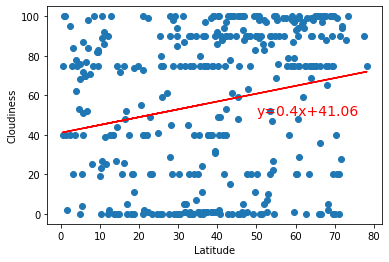

In [47]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude1, Cloudiness1)
regressionvalues_c1 = latitude1 * slope + intercept

plt.scatter(latitude1, Cloudiness1)
plt.plot(latitude1, regressionvalues_c1, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(50, 50, line, fontsize=14, color="red")
plt.savefig("fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y=1.05x+72.35


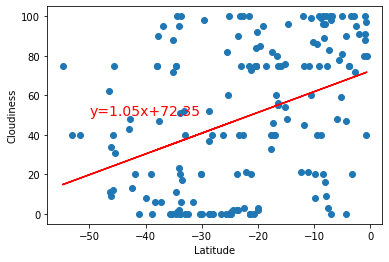

In [49]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude2, Cloudiness2)
regressionvalues_c2 = latitude2 * slope + intercept

plt.scatter(latitude2, Cloudiness2)
plt.plot(latitude2, regressionvalues_c2, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-50, 50, line, fontsize=14, color="red")
plt.savefig("fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y=0.03x+2.67


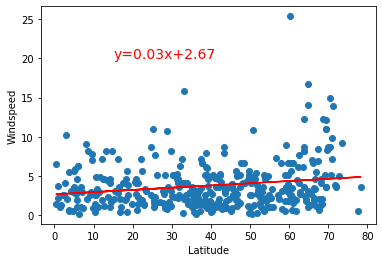

In [51]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude1, Windspeed1)
regressionvalues_ws1 = latitude1 * slope + intercept

plt.scatter(latitude1, Windspeed1)
plt.plot(latitude1, regressionvalues_ws1, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.text(15, 20, line, fontsize=14, color="red")
plt.savefig("fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y=-0.04x+2.98


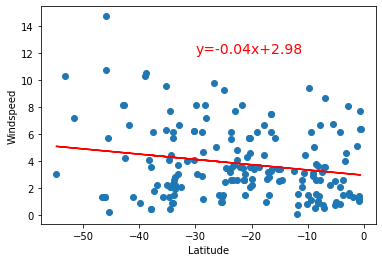

In [53]:
(slope, intercept, rvalue, pvalues, stderr) = stats.linregress(latitude2, Windspeed2)
regressionvalues_ws2 = latitude2 * slope + intercept

plt.scatter(latitude2, Windspeed2)
plt.plot(latitude2, regressionvalues_ws2, color="red")

line = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
print(line)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.text(-30, 12, line, fontsize=14, color="red")
plt.savefig("fig12.png")